In [2]:
#Installing necessary packagesinstall.packages("arules")
install.packages("dplyr")

#Loading the libraries
library(arules)
library(dplyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [29]:
#Loading my dataset
game_data <- read.csv("/content/game_details_copy.csv", stringsAsFactors = FALSE)

#Cleaning up the categories column by removing {, }, [, ], '
game_data$categories <- gsub("[\\{\\}\\[\\]]", "", game_data$categories)
game_data$categories <- gsub("'", "", game_data$categories)
game_data$categories <- gsub("\\[|\\]", "", game_data$categories)



#Viewing the first few rows of the cleaned dataset
head(game_data$categories)


[1] "Economic, Negotiation"                                                                                    
[2] "Medieval, Territory Building"                                                                             
[3] "Medical"                                                                                                  
[4] "Ancient, Card Game, City Building, Civilization, Economic"                                                
[5] "Economic, Environmental, Industry / Manufacturing, Science Fiction, Space Exploration, Territory Building"
[6] "Ancient, Card Game, City Building, Civilization, Economic"

In [30]:
#Separateing the categories column into basket data
#Splitting the categories by comma and creating a list of transactions
basket_data <- strsplit(game_data$categories, ", ")

#Creating a transaction object
basket_transactions <- as(basket_data, "transactions")


In [31]:
#Inspecting the basket data
inspect(head(basket_transactions, 5))


    items                      
[1] {Economic,                 
     Negotiation}              
[2] {Medieval,                 
     Territory Building}       
[3] {Medical}                  
[4] {Ancient,                  
     Card Game,                
     City Building,            
     Civilization,             
     Economic}                 
[5] {Economic,                 
     Environmental,            
     Industry / Manufacturing, 
     Science Fiction,          
     Space Exploration,        
     Territory Building}       


In [32]:
#Generating association rules with a minimum support and confidence
rules <- apriori(basket_transactions,
                 parameter = list(supp = 0.01, conf = 0.6))

#Inspecting the generated rules
inspect(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[82 item(s), 3000 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [66 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                           rhs                  support confidence   coverage      lift count
[1]  {World War II}             => {Wargame}         0.01233333  0.7708333 0.01600000 11.562500    37
[2]  {Word Game}                => {Party Game}      0.01133333  0.7555556 0.01500

In [33]:
#Sorting rules by lift and inspecting the top 10 rules
sorted_rules <- sort(rules, by = "lift", decreasing = TRUE)
inspect(head(sorted_rules, 10))

     lhs                 rhs             support confidence   coverage      lift count
[1]  {Zombies}        => {Horror}     0.01100000  0.7333333 0.01500000 12.087912    33
[2]  {World War II}   => {Wargame}    0.01233333  0.7708333 0.01600000 11.562500    37
[3]  {Murder/Mystery} => {Deduction}  0.01600000  0.7500000 0.02133333 11.138614    48
[4]  {Word Game}      => {Party Game} 0.01133333  0.7555556 0.01500000 10.445469    34
[5]  {Exploration,                                                                    
      Fantasy,                                                                        
      Miniatures}     => {Adventure}  0.01700000  0.9622642 0.01766667  9.590673    51
[6]  {Exploration,                                                                    
      Fantasy,                                                                        
      Fighting,                                                                       
      Miniatures}     => {Adventure}  0.015

In [34]:
#Generating association rules with a minimum support and higher confidence
rules_high_conf <- apriori(basket_transactions,
                 parameter = list(supp = 0.01, conf = 0.8))

#Inspecting the generated rules
inspect(rules_high_conf)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[82 item(s), 3000 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                    rhs                  support confidence   coverage     lift count
[1]  {Space Exploration} => {Science Fiction} 0.03100000  0.9393939 0.03300000 8.288770    93
[2]  {Exploration,                                                                           
    

In [35]:
#Sortting rules by lift and inspect the top 10 rules
sorted_rules_high_conf <- sort(rules_high_conf, by = "lift", decreasing = TRUE)
inspect(head(sorted_rules_high_conf, 10))

     lhs                    rhs                  support confidence   coverage     lift count
[1]  {Exploration,                                                                           
      Fantasy,                                                                               
      Miniatures}        => {Adventure}       0.01700000  0.9622642 0.01766667 9.590673    51
[2]  {Exploration,                                                                           
      Fantasy,                                                                               
      Fighting,                                                                              
      Miniatures}        => {Adventure}       0.01500000  0.9574468 0.01566667 9.542659    45
[3]  {Exploration,                                                                           
      Fantasy,                                                                               
      Fighting}          => {Adventure}       0.02233333  0.

In [36]:
#Generating association rules with a higher support and minimum confidence
rules_high_supp <- apriori(basket_transactions,
                 parameter = list(supp = 0.05, conf = 0.6))

#Inspecting the generated rules
inspect(rules_high_supp)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[82 item(s), 3000 transaction(s)] done [0.00s].
sorting and recoding items ... [21 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs            rhs       support    confidence coverage  lift     count
[1] {Adventure} => {Fantasy} 0.06366667 0.6345515  0.1003333 3.045847 191  
[2] {Fighting}  => {Fantasy} 0.08733333 0.6009174  0.1453333 2.884404 262  


In [38]:
# Filter rules containing 'Fantasy'
fantasy_rules <- subset(rules, rhs %pin% "Fantasy")
inspect(fantasy_rules)

     lhs                           rhs          support confidence   coverage     lift count
[1]  {Adventure}                => {Fantasy} 0.06366667  0.6345515 0.10033333 3.045847   191
[2]  {Fighting}                 => {Fantasy} 0.08733333  0.6009174 0.14533333 2.884404   262
[3]  {Adventure,                                                                            
      Novel-based}              => {Fantasy} 0.01233333  0.6851852 0.01800000 3.288889    37
[4]  {Fighting,                                                                             
      Novel-based}              => {Fantasy} 0.01166667  0.6603774 0.01766667 3.169811    35
[5]  {Card Game,                                                                            
      Novel-based}              => {Fantasy} 0.01000000  0.6250000 0.01600000 3.000000    30
[6]  {Dice,                                                                                 
      Fighting}                 => {Fantasy} 0.01000000  0.6000000 0.0

In [39]:
# Filter rules containing 'Fantasy'
adventure_rules <- subset(rules, rhs %pin% "Adventure")
inspect(adventure_rules)

     lhs               rhs            support confidence   coverage     lift count
[1]  {Fighting,                                                                   
      Novel-based}  => {Adventure} 0.01200000  0.6792453 0.01766667 6.769887    36
[2]  {Exploration,                                                                
      Miniatures}   => {Adventure} 0.02233333  0.8815789 0.02533333 8.786501    67
[3]  {Fantasy,                                                                    
      Miniatures}   => {Adventure} 0.02533333  0.6440678 0.03933333 6.419280    76
[4]  {Exploration,                                                                
      Fighting}     => {Adventure} 0.02433333  0.8021978 0.03033333 7.995327    73
[5]  {Exploration,                                                                
      Fantasy}      => {Adventure} 0.03000000  0.7894737 0.03800000 7.868508    90
[6]  {Exploration,                                                                
    

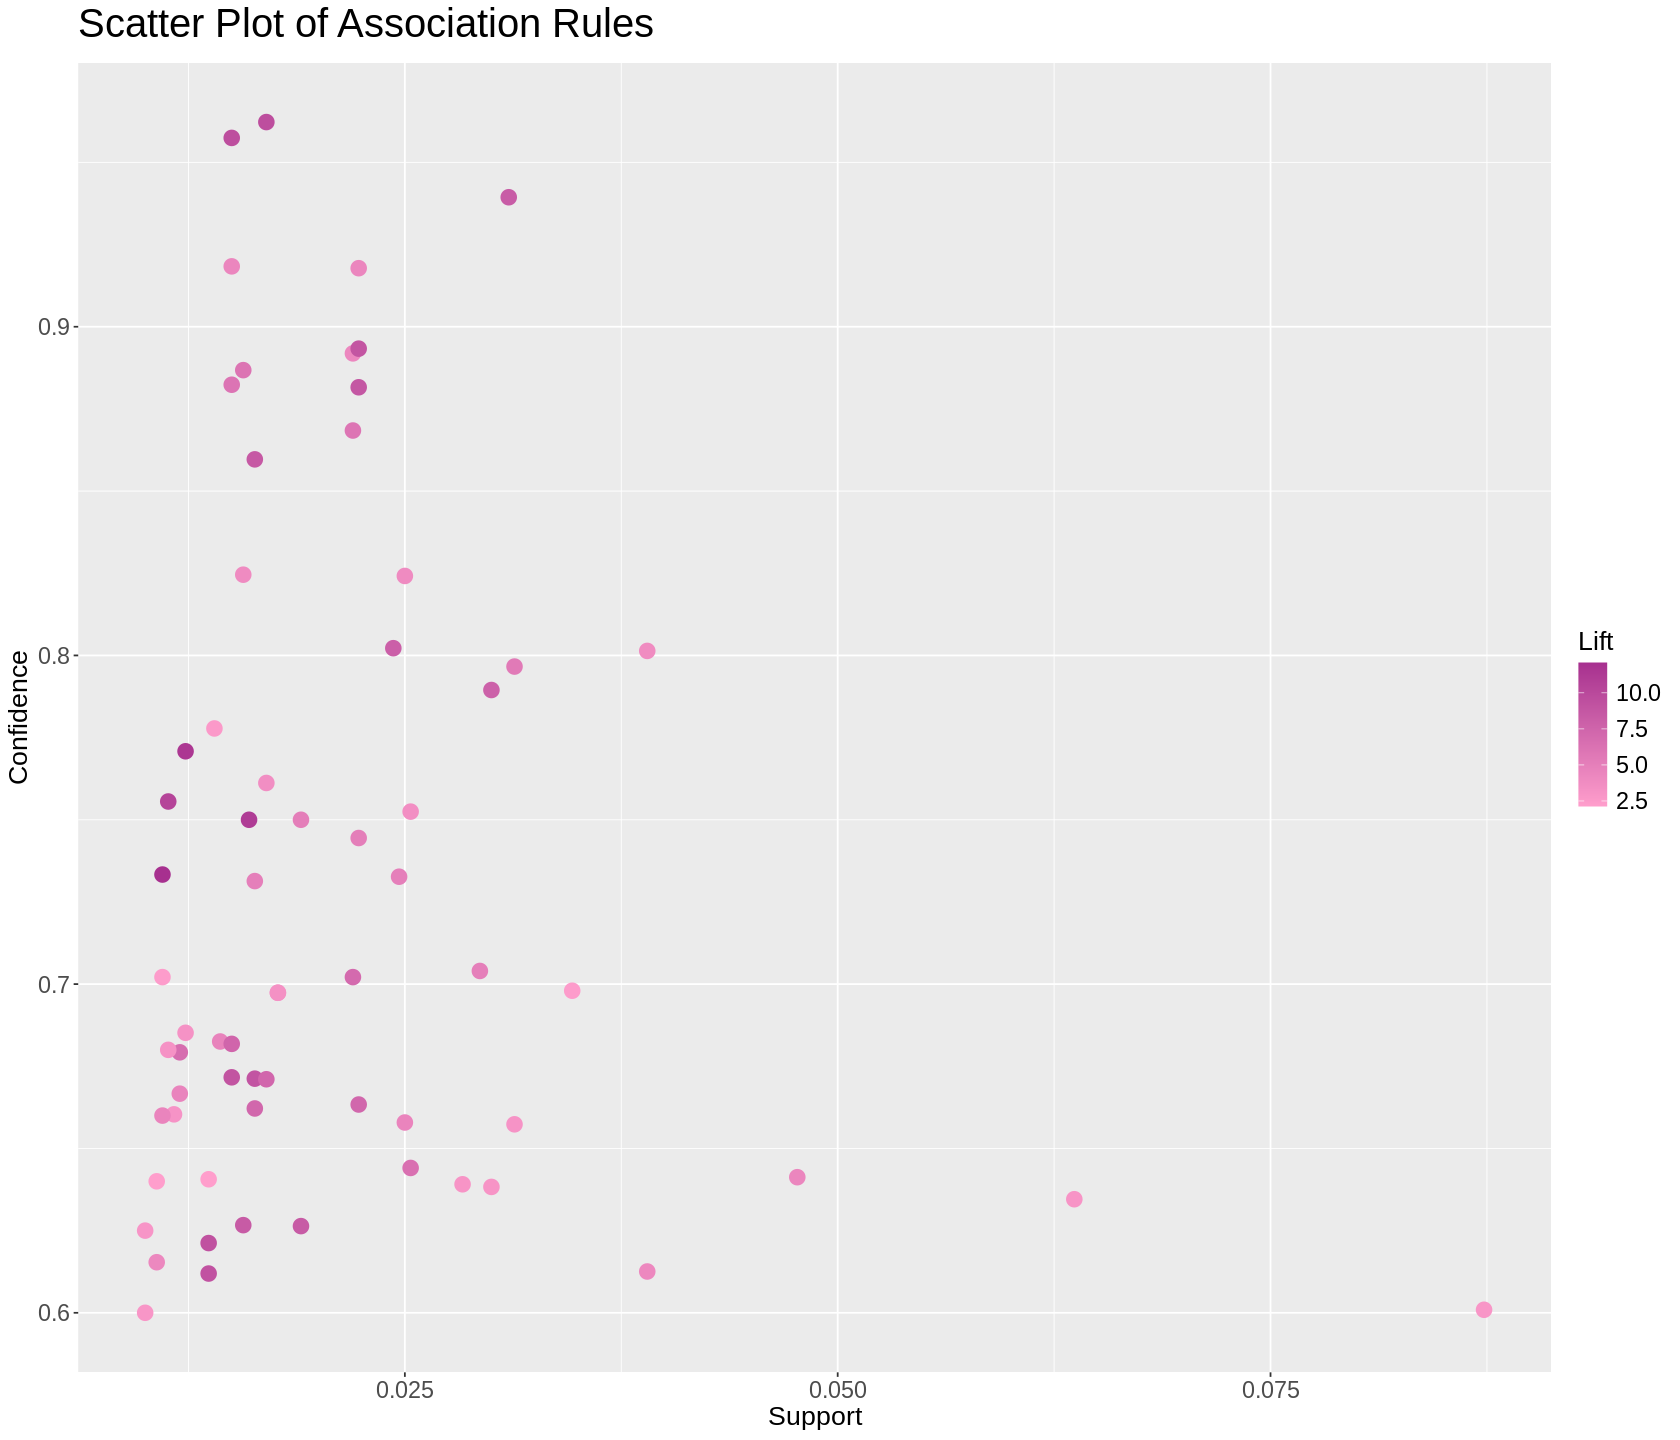

In [69]:
#Converting the rules to a data frame
rules_df <- as(rules, "data.frame")

#Creating a scatter plot of Rules
options(repr.plot.width=14, repr.plot.height=12)
ggplot(rules_df, aes(x = support, y = confidence, label = labels(rules))) +
  geom_point(aes(color = lift), size = 4, alpha = 1) +
  labs(title = "Scatter Plot of Association Rules",
       x = "Support",
       y = "Confidence",
       color = "Lift") +
  theme(
    plot.title = element_text(size = 24, margin = margin(b = 10)),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  ) +
  scale_color_gradient(low = "#ff9ecc", high = "#a7308f")

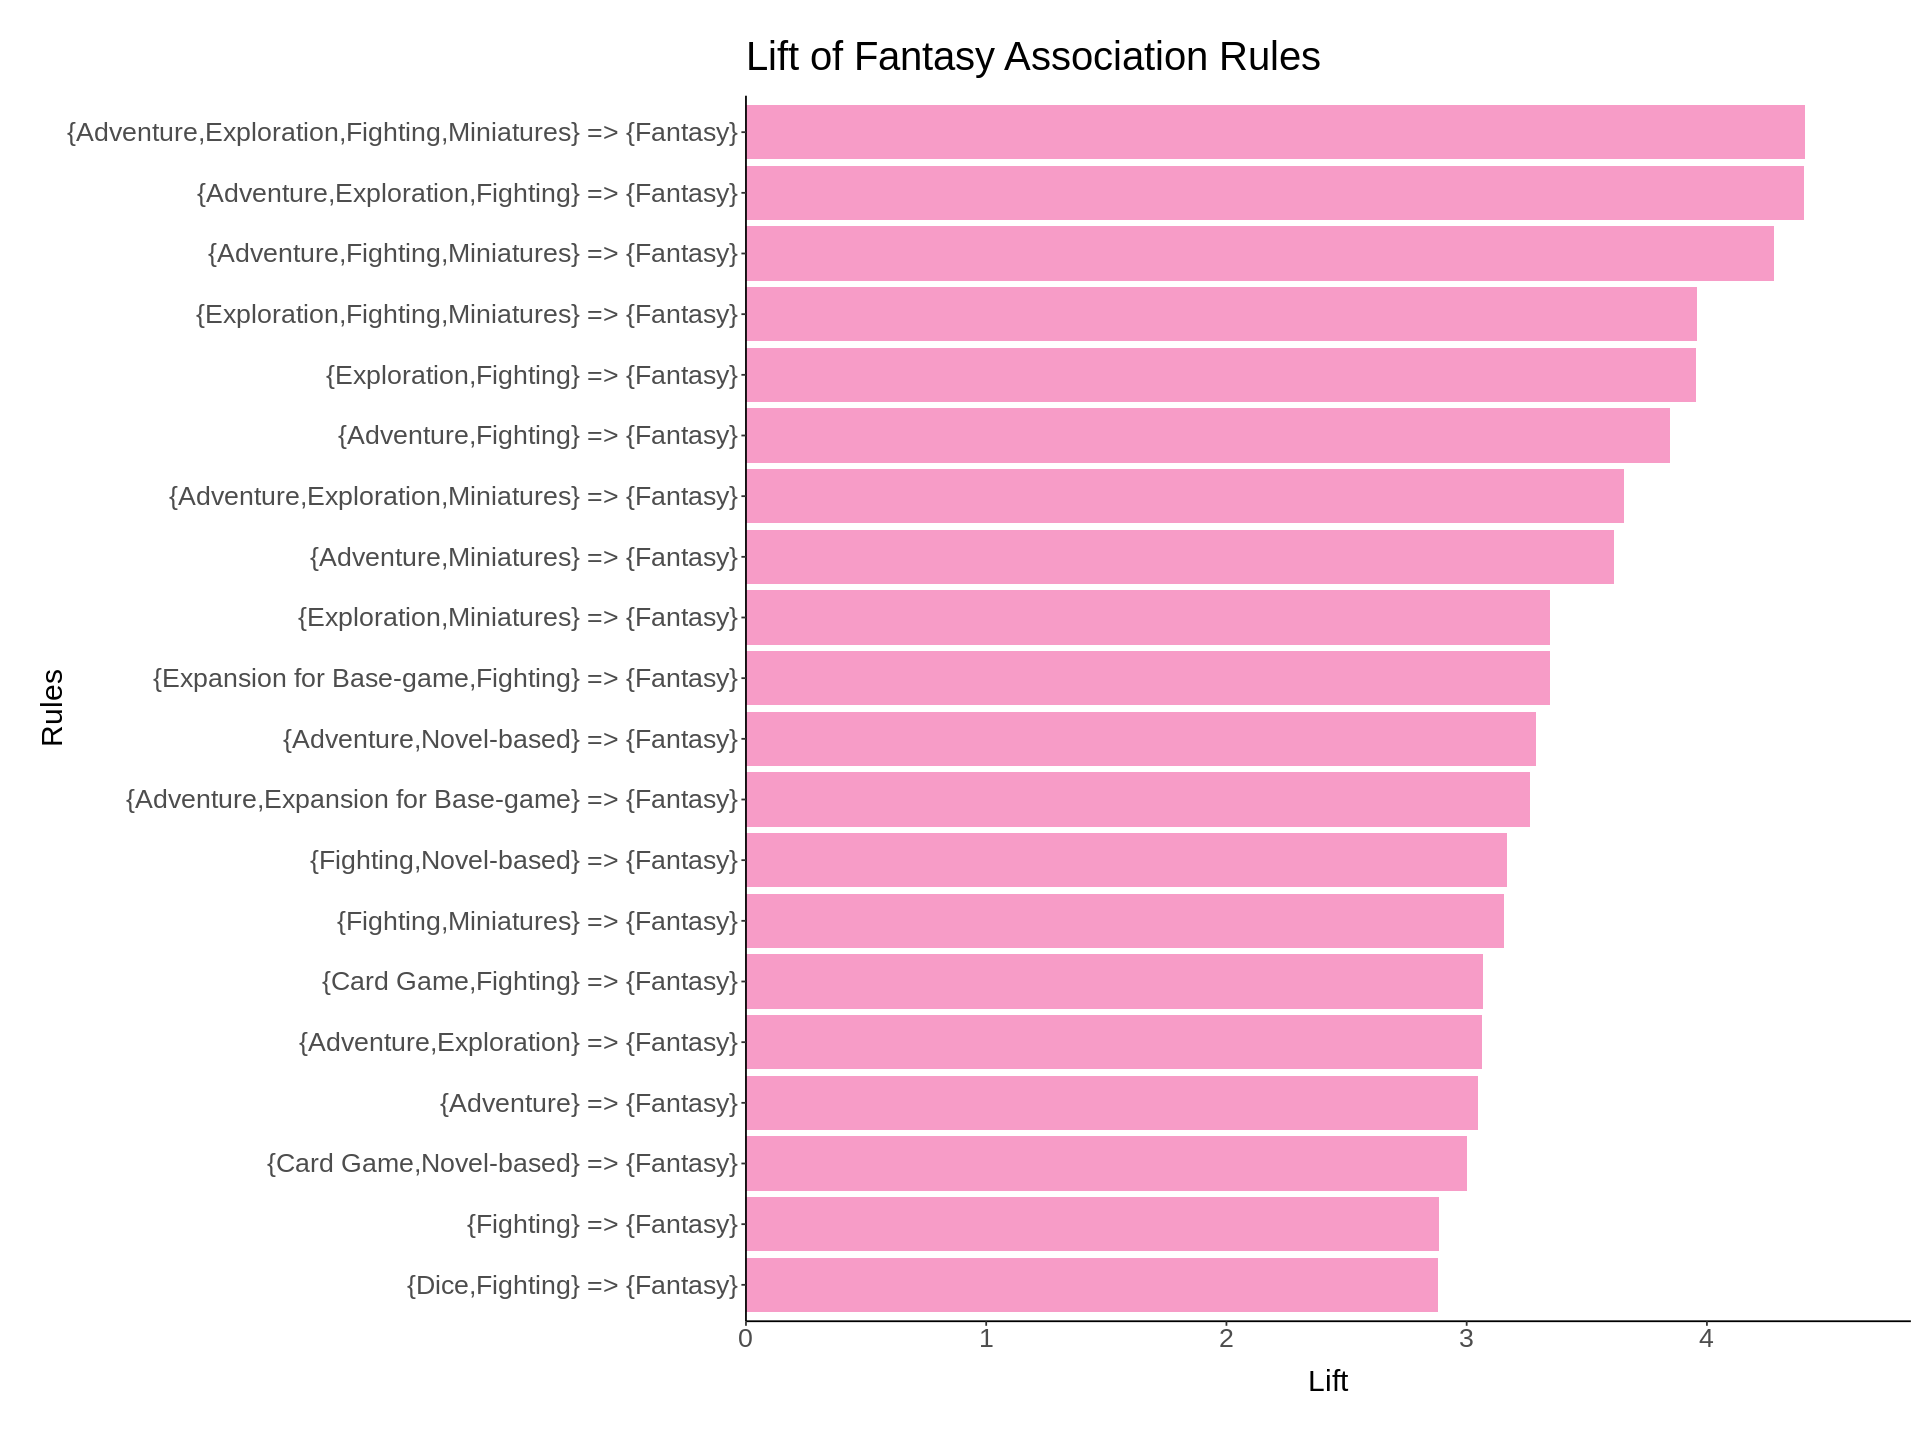

In [111]:
#Convert the rules to a data frame
fantasy_rules_df <- as(fantasy_rules, "data.frame")

#Bar plot for Lift
options(repr.plot.width=16, repr.plot.height=12)
ggplot(fantasy_rules_df, aes(x = reorder(labels(fantasy_rules), lift), y = lift)) +
  geom_bar(stat = "identity", fill = "#f79cc7") + # Set bar color
  labs(title = "Lift of Fantasy Association Rules",
       x = "Rules",
       y = "Lift") +
  coord_flip() +
  scale_y_continuous(expand = c(0, 0), limits = c(0, max(fantasy_rules_df$lift) * 1.1)) +
  theme_classic() +
  theme(
    plot.title = element_text(size = 24, margin = margin(t = 20, b = 10)), # Increase title size
    axis.title.x = element_text(size = 18, margin = margin(t = 10, b = 20)), # Increase x-axis title size
    axis.title.y = element_text(size = 18, margin = margin(l = 20)), # Increase y-axis title size
    axis.text.x = element_text(size = 16), # Rotate x-axis text
    axis.text.y = element_text(size = 16) # Increase y-axis text size
  )



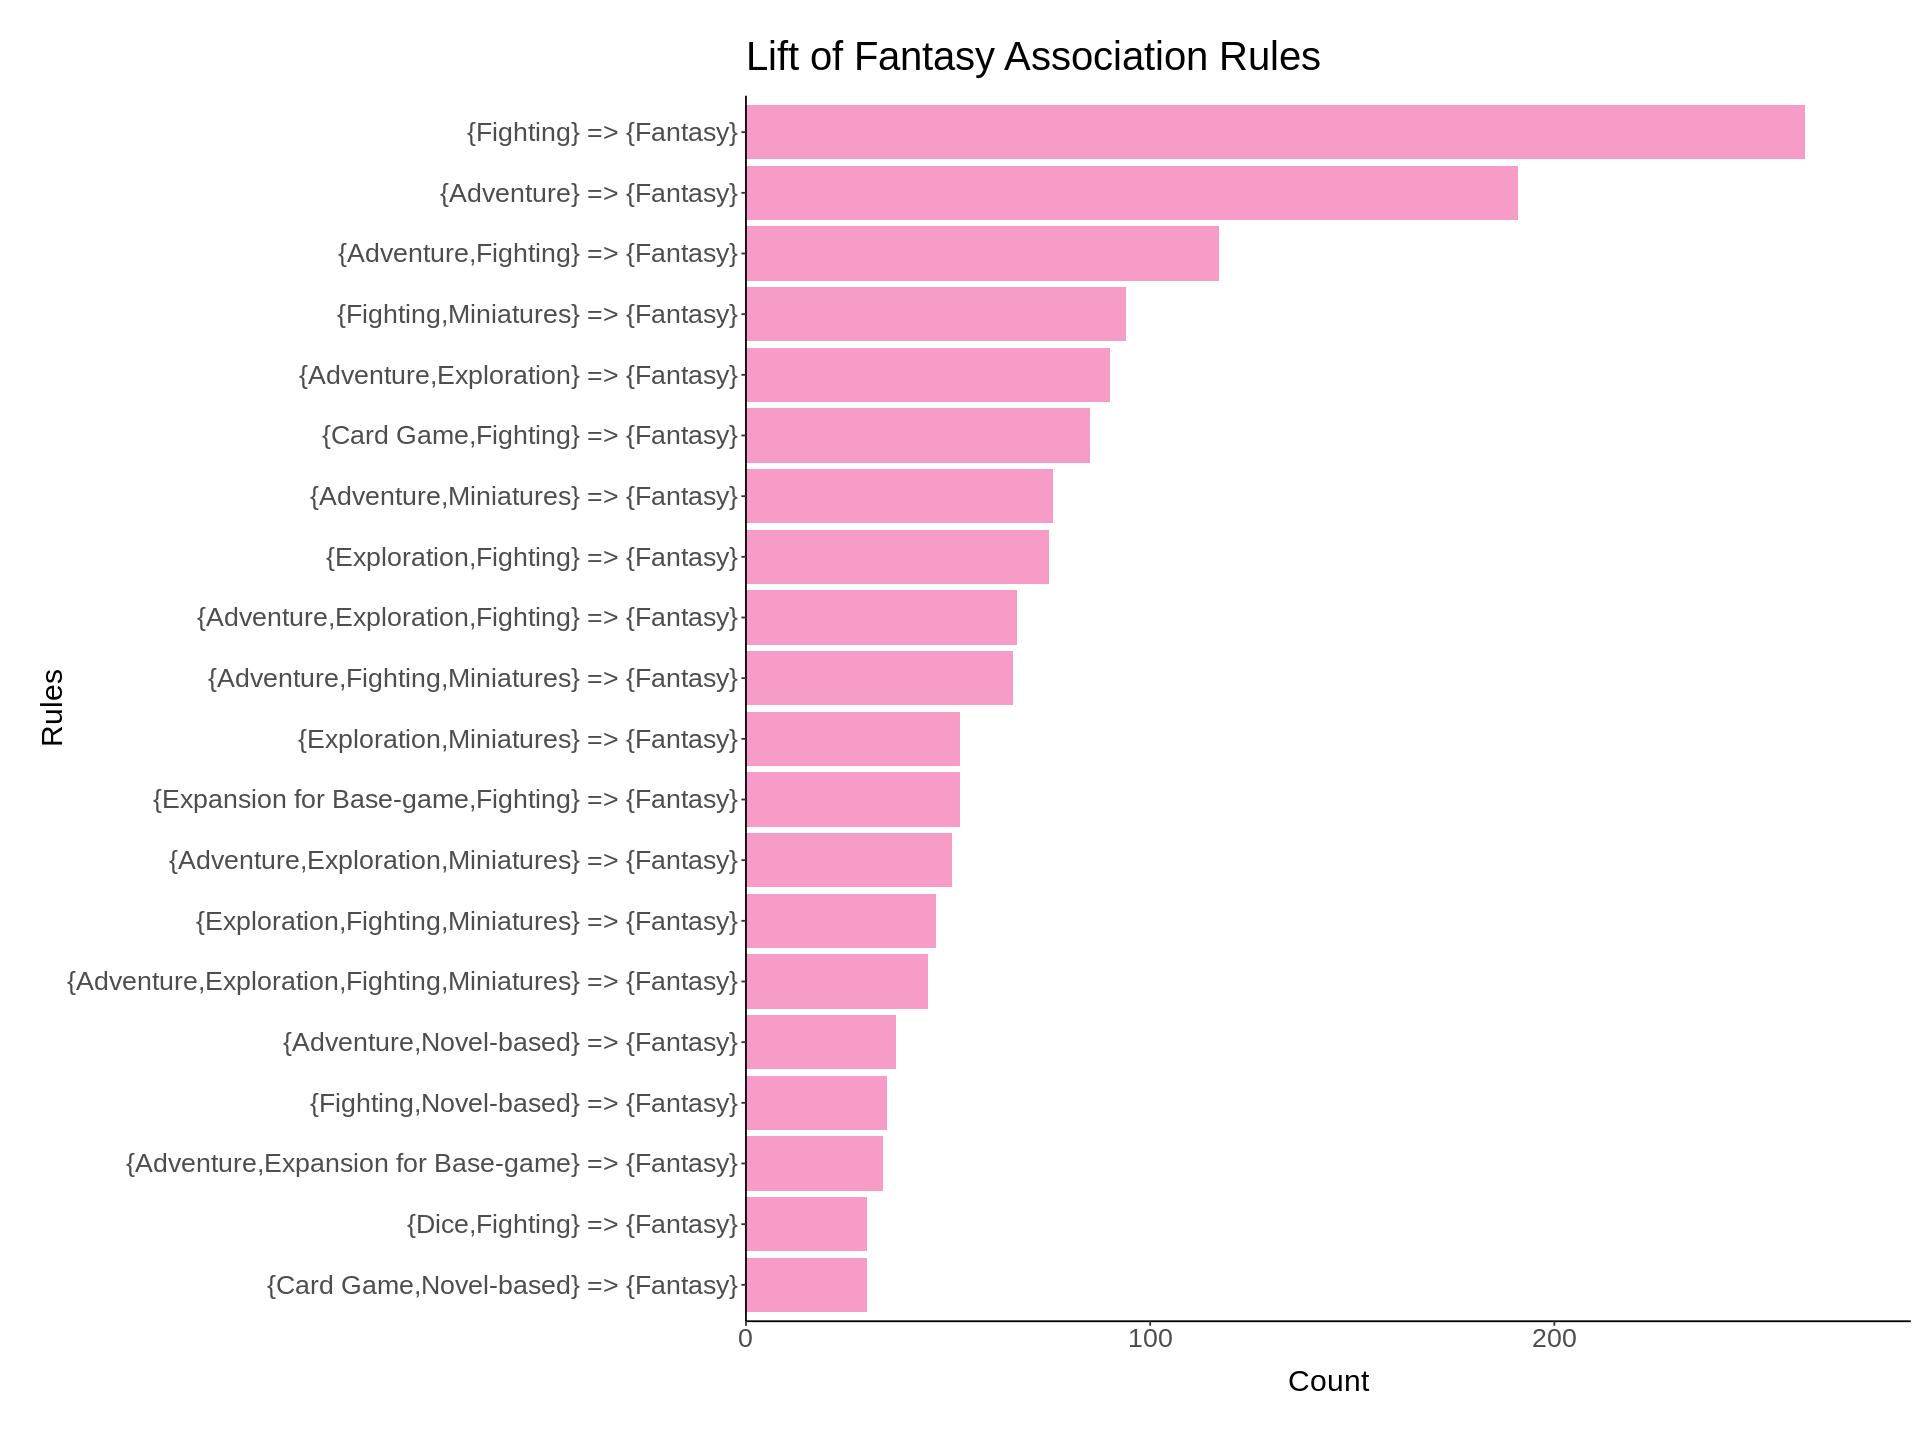

In [105]:
# Convert the rules to a data frame
fantasy_rules_df <- as(fantasy_rules, "data.frame")

# Bar plot for Lift
options(repr.plot.width=16, repr.plot.height=12)
ggplot(fantasy_rules_df, aes(x = reorder(labels(fantasy_rules), +count), y = count)) + # Negative sign for descending order
  geom_bar(stat = "identity", fill = "#f79cc7") + # Set bar color
  labs(title = "Count of Fantasy Association Rules",
       x = "Rules",
       y = "Count") +
  coord_flip() +
  scale_y_continuous(expand = c(0, 0), limits = c(0, max(fantasy_rules_df$count) * 1.1)) +
  theme_classic() +
  theme(
    plot.title = element_text(size = 24, margin = margin(t = 20, b = 10)), # Increase title size
    axis.title.x = element_text(size = 18, margin = margin(t = 10, b = 20)), # Increase x-axis title size
    axis.title.y = element_text(size = 18, margin = margin(l = 20)), # Increase y-axis title size
    axis.text.x = element_text(size = 16), # Increase x-axis text size
    axis.text.y = element_text(size = 16) # Increase y-axis text size
  )
